# NLP Sentiment Analysis on Movie Reviews with Toxic Comment Detection

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
import sys

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
#Extracting Data from a text files and storing into Lists.
training_data=[]
test_data=[]

for sentence in open('training_data.txt', encoding='utf-8'):
    training_data.append(sentence.strip())

for sentence in open('test_data.txt', encoding='utf-8'):
    test_data.append(sentence.strip())
    
target = [1 if i < 12500 else 0 for i in range(25000)]  

# Data Cleaning and Preprocessing 

In [3]:
# Removing html,xml tags, special characters, irrelevant symbols
line = []
str1 = ""
str2 = " "
first_clean = re.compile("(\!)|(\?)(\,)|(\")|(\.)|(\;)|(\:)|(\()|(\))|(\[)|(\])|(\d+)")
second_clean = re.compile("(\-)|(\/)|(<br\s*/><br\s*/>)")

def data_preprocessing(data):
    data = [first_clean.sub(str1, i.lower()) for i in data]
    data = [second_clean.sub(str2, j) for j in data]
    return data

clean_training_data = data_preprocessing(training_data)
clean_test_data = data_preprocessing(test_data)

clean_training_data[:1]
clean_test_data[:1]


["i went and saw this movie last night after being coaxed to by a few friends of mine i'll admit that i was reluctant to see it because from what i knew of ashton kutcher he was only able to do comedy i was wrong kutcher played the character of jake fischer very well, and kevin costner played ben randall with such professionalism the sign of a good movie is that it can toy with our emotions this one did exactly that the entire theater which was sold out was overcome by laughter during the first half of the movie, and were moved to tears during the second half while exiting the theater i not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying this movie was great, and i suggest that you go see it before you judge"]

In [4]:
#Expanding Contractions to its original form
def expand_contractions(corpus):
    expanded_word = []    
    for i in corpus:
        expanded_word.append(' '.join([contractions.fix(word) for word in i.split()]))  
    return expanded_word
    
final_training_data = expand_contractions(clean_training_data)    
final_training_data[:1]

["bromwell high is a cartoon comedy it ran at the same time as some other programs about school life, such as teachers my years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school, i immediately recalled at high a classic line inspector I am here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it is not"]

In [5]:
#Identifying stopwords
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dedee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Removing stopwords
nltk.download('punkt')

def stopwords(text):
    data_without_stopwords = []
    for i in text: 
        data_without_stopwords.append(' '.join([word for word in i.split() if not word in all_stopwords]))
    return data_without_stopwords

train_without_sw = stopwords(clean_training_data)
train_without_sw[:1]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dedee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["bromwell high cartoon comedy ran time programs school life, teachers years teaching profession lead believe bromwell high's satire much closer reality teachers scramble survive financially, insightful students see right pathetic teachers' pomp, pettiness whole situation, remind schools knew students saw episode student repeatedly tried burn school, immediately recalled high classic line inspector i'm sack one teachers student welcome bromwell high expect many adults age think bromwell high far fetched pity"]

In [7]:
# Stemming words to remove suffixes
def stemming(corpus):
    word_stemmer = PorterStemmer()
    stem=[]
    for i in corpus:
        stem.append(' '.join([word_stemmer.stem(word) for word in i.split()]))
    return stem

stemmed_data = stemming(clean_training_data)
stemmed_data[:1]

["bromwel high is a cartoon comedi it ran at the same time as some other program about school life, such as teacher my year in the teach profess lead me to believ that bromwel high' satir is much closer to realiti than is teacher the scrambl to surviv financially, the insight student who can see right through their pathet teachers' pomp, the petti of the whole situation, all remind me of the school i knew and their student when i saw the episod in which a student repeatedli tri to burn down the school, i immedi recal at high a classic line inspector i'm here to sack one of your teacher student welcom to bromwel high i expect that mani adult of my age think that bromwel high is far fetch what a piti that it isn't"]

In [8]:
#Lemmitization to bring context to the data
nltk.download('wordnet')
def lemmitization(corpus):
    lemmatizer = WordNetLemmatizer()
    lem = []
    for i in corpus:
        lem.append(' '.join([lemmatizer.lemmatize(word) for word in i.split()]))
    return lem

lemmitized_data = lemmitization(clean_training_data)
lemmitized_data[:1]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dedee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


["bromwell high is a cartoon comedy it ran at the same time a some other program about school life, such a teacher my year in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teacher the scramble to survive financially, the insightful student who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the school i knew and their student when i saw the episode in which a student repeatedly tried to burn down the school, i immediately recalled at high a classic line inspector i'm here to sack one of your teacher student welcome to bromwell high i expect that many adult of my age think that bromwell high is far fetched what a pity that it isn't"]

# Feature Extraction --> Bag of Words Model

In [9]:
# Initializing a bag of words  
Vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 1000) 

# Transform and fit the data
X_train_bwm = Vectorizer.fit_transform(clean_training_data).toarray()
y_test_bwm = Vectorizer.transform(clean_test_data).toarray()
print(X_train_bwm.shape, y_test_bwm.shape)

(25000, 1000) (25000, 1000)


In [10]:
#Split the data into train and test data
X_train, X_test, y_train, y_val = train_test_split(X_train_bwm, target,test_size = 0.30)

In [11]:
#Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bwm, target)                              
print ("Accuracy Score For Naive Bayes: %s"% accuracy_score(target, naive_bayes.predict(y_test_bwm)))
print ("F1 score For Naive Bayes:",f1_score(target, naive_bayes.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Decision Tree Classifier:\n",confusion_matrix(target,naive_bayes.predict(y_test_bwm)))


Accuracy Score For Naive Bayes: 0.80772
F1 score For Naive Bayes: 0.8076690249060906

Confusion Matrix For Decision Tree Classifier:
 [[10300  2200]
 [ 2607  9893]]


In [12]:
#Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion = "entropy")
decision_tree.fit(X_train_bwm, target)

print ("Accuracy Score For Decision Tree Classifier: %s"% accuracy_score(target, decision_tree.predict(y_test_bwm)))
print ("F1 score For Decision Tree Classifier:", f1_score(target, decision_tree.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Decision Tree Classifier:\n",confusion_matrix(target,decision_tree.predict(y_test_bwm)))


Accuracy Score For Decision Tree Classifier: 0.69696
F1 score For Decision Tree Classifier: 0.6969567397393888

Confusion Matrix For Decision Tree Classifier:
 [[8671 3829]
 [3747 8753]]


In [13]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 500)
random_forest.fit(X_train_bwm, target)

print ("Accuracy Score For Random Forest Classifier: %s"% accuracy_score(target, random_forest.predict(y_test_bwm)))
print ("F1 score For Random Forest Classifier:", f1_score(target, random_forest.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Random Forest Classifier:\n",confusion_matrix(target,random_forest.predict(y_test_bwm)))


Accuracy Score For Random Forest Classifier: 0.83624
F1 score For Random Forest Classifier: 0.8362188641099257

Confusion Matrix For Random Forest Classifier:
 [[10311  2189]
 [ 1905 10595]]


In [14]:
#Logistic Regression Classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_bwm, target)
print ("Accuracy Score For Logistic Regression Classifier: %s"% accuracy_score(target, logistic_reg.predict(y_test_bwm)))
print ("F1 score For Logistic Regression Classifier:", f1_score(target, logistic_reg.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Logistic Regression Classifier:\n",confusion_matrix(target,logistic_reg.predict(y_test_bwm)))


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score For Logistic Regression Classifier: 0.86164
F1 score For Logistic Regression Classifier: 0.8616249180016626

Confusion Matrix For Logistic Regression Classifier:
 [[10640  1860]
 [ 1599 10901]]


In [15]:
#Linear Support Vector Machine
from sklearn.svm import LinearSVC
support = LinearSVC()
support.fit(X_train_bwm, target)

print ("Accuracy for Linear Support Vector Machine: %s"% accuracy_score(target, support.predict(y_test_bwm)))
print ("F1 score for Linear Support Vector Machine:", f1_score(target, support.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix for Linear Support Vector Machine:\n",confusion_matrix(target,support.predict(y_test_bwm)))

E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy for Linear Support Vector Machine: 0.85904
F1 score for Linear Support Vector Machine: 0.8589666852416561

Confusion Matrix for Linear Support Vector Machine:
 [[10453  2047]
 [ 1477 11023]]


Accuracy Score Comparision

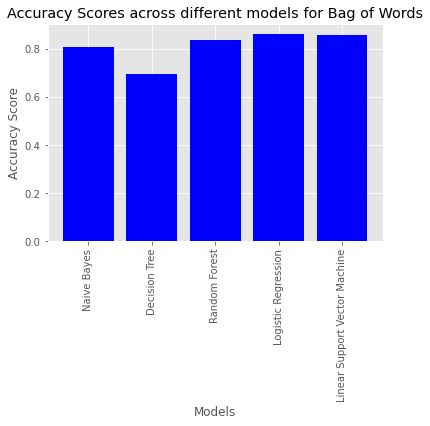

In [16]:
import matplotlib.pyplot as plt

x1 = accuracy_score(target, naive_bayes.predict(y_test_bwm))
x2 = accuracy_score(target, decision_tree.predict(y_test_bwm))
x3 = accuracy_score(target, random_forest.predict(y_test_bwm))
x4 = accuracy_score(target, logistic_reg.predict(y_test_bwm))
x5 = accuracy_score(target, support.predict(y_test_bwm))
plt.style.use('ggplot')

classifiers_name =  ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression', 'Linear Support Vector Machine']
model = [x1,x2,x3,x4,x5]
x_position = [i for i, _ in enumerate(classifiers_name)]
plt.bar(classifiers_name, model, color='blue')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores across different models for Bag of Words")
plt.xticks(x_position, classifiers_name, rotation = 90)

plt.show()

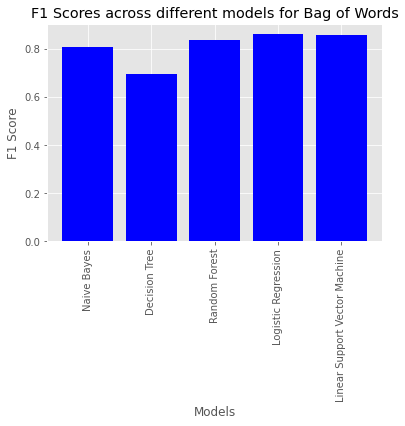

In [17]:
import matplotlib.pyplot as plt

x1 = f1_score(target, naive_bayes.predict(y_test_bwm), average='weighted')
x2 = f1_score(target, decision_tree.predict(y_test_bwm), average='weighted')
x3 = f1_score(target, random_forest.predict(y_test_bwm), average='weighted')
x4 = f1_score(target, logistic_reg.predict(y_test_bwm), average='weighted')
x5 = f1_score(target, support.predict(y_test_bwm), average='weighted')

plt.style.use('ggplot')

classifiers_name =  ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression', 'Linear Support Vector Machine']
model = [x1,x2,x3,x4,x5]
x_position = [i for i, _ in enumerate(classifiers_name)]
plt.bar(classifiers_name, model, color='blue')
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Scores across different models for Bag of Words")
plt.xticks(x_position, classifiers_name, rotation = 90)

plt.show()

# Feature Extraction -->N-Gram

In [18]:
stop_words = ['at','in', 'of', 'a', 'the','and']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words = stop_words)
ngram_vectorizer.fit(clean_training_data)
X_train_bwm = ngram_vectorizer.transform(clean_training_data)
y_test_bwm = ngram_vectorizer.transform(clean_test_data)

X_train, X_test, y_train, y_test = train_test_split(X_train_bwm, target, train_size = 0.80)

    

In [19]:
#Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bwm, target)

print ("Accuracy Score For Naive Bayes: %s"% accuracy_score(target, naive_bayes.predict(y_test_bwm)))
print ("F1 score For Naive Bayes:", f1_score(target, naive_bayes.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Naive Bayes:\n",confusion_matrix(target,naive_bayes.predict(y_test_bwm)))


Accuracy Score For Naive Bayes: 0.86652
F1 score For Naive Bayes: 0.8661552945929186

Confusion Matrix For Naive Bayes:
 [[11484  1016]
 [ 2321 10179]]


In [20]:
#Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion = "entropy")
decision_tree.fit(X_train_bwm, target)

print ("Accuracy Score For Decision Tree Classifier: %s"% accuracy_score(target, decision_tree.predict(y_test_bwm)))
print ("F1 score For Decision Tree Classifier:", f1_score(target, decision_tree.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Decision Tree Classifier:\n",confusion_matrix(target,decision_tree.predict(y_test_bwm)))


Accuracy Score For Decision Tree Classifier: 0.71616
F1 score For Decision Tree Classifier: 0.7161585757972698

Confusion Matrix For Decision Tree Classifier:
 [[8924 3576]
 [3520 8980]]


In [21]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 30)
random_forest.fit(X_train_bwm, target)

print ("Accuracy Score For Random Forest Classifier: %s"% accuracy_score(target, random_forest.predict(y_test_bwm)))
print ("F1 score For Random Forest Classifier:", f1_score(target, random_forest.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Random Forest Classifier:\n",confusion_matrix(target,random_forest.predict(y_test_bwm)))


Accuracy Score For Random Forest Classifier: 0.8164
F1 score For Random Forest Classifier: 0.8162840726043039

Confusion Matrix For Random Forest Classifier:
 [[10519  1981]
 [ 2609  9891]]


In [22]:
#Logistic Regression Classifier

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_bwm, target)

print ("Accuracy Score For Logistic Regression Classifier: %s"% accuracy_score(target, logistic_reg.predict(y_test_bwm)))
print ("F1 score For Logistic Regression Classifier:", f1_score(target, logistic_reg.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Logistic Regression Classifier:\n",confusion_matrix(target,logistic_reg.predict(y_test_bwm)))


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score For Logistic Regression Classifier: 0.8992
F1 score For Logistic Regression Classifier: 0.8991991639175452

Confusion Matrix For Logistic Regression Classifier:
 [[11204  1296]
 [ 1224 11276]]


In [23]:
#Linear Support Vector Machine
support = LinearSVC()
support.fit(X_train_bwm, target)

print ("Accuracy for Linear Support Vector Machine: %s"% accuracy_score(target, support.predict(y_test_bwm)))
print ("F1 score for Linear Support Vector Machine:", f1_score(target, support.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix for Linear Support Vector Machine:\n",confusion_matrix(target,support.predict(y_test_bwm)))

E:\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy for Linear Support Vector Machine: 0.8942
F1 score for Linear Support Vector Machine: 0.8941997926315935

Confusion Matrix for Linear Support Vector Machine:
 [[11160  1340]
 [ 1305 11195]]


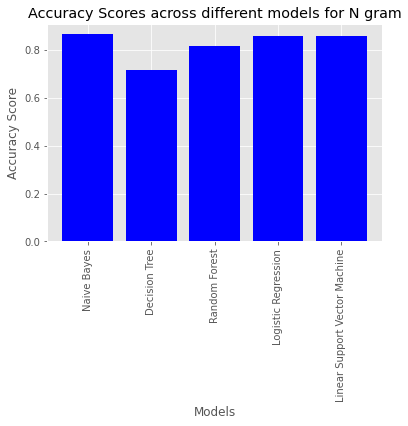

In [24]:
import matplotlib.pyplot as plt

p1 = accuracy_score(target, naive_bayes.predict(y_test_bwm))
p2 = accuracy_score(target, decision_tree.predict(y_test_bwm))
p3 = accuracy_score(target, random_forest.predict(y_test_bwm))
p4 = accuracy_score(target, logistic_reg.predict(y_test_bwm))
p5 = accuracy_score(target, support.predict(y_test_bwm))
plt.style.use('ggplot')

classifiers_name =  ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression', 'Linear Support Vector Machine']
model = [p1,p2,p3,x4,x5]
x_position = [i for i, _ in enumerate(classifiers_name)]
plt.bar(classifiers_name, model, color='blue')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores across different models for N gram")
plt.xticks(x_position, classifiers_name, rotation = 90)

plt.show()

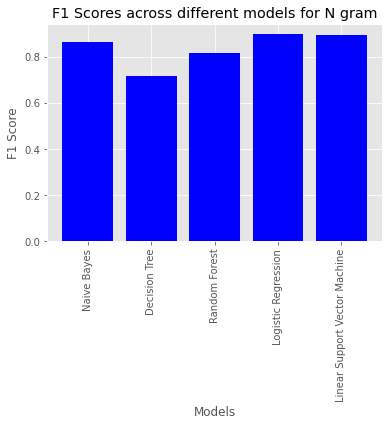

In [25]:
import matplotlib.pyplot as plt

p1 = f1_score(target, naive_bayes.predict(y_test_bwm), average='weighted')
p2 = f1_score(target, decision_tree.predict(y_test_bwm), average='weighted')
p3 = f1_score(target, random_forest.predict(y_test_bwm), average='weighted')
p4 = f1_score(target, logistic_reg.predict(y_test_bwm), average='weighted')
p5 = f1_score(target, support.predict(y_test_bwm), average='weighted')

plt.style.use('ggplot')

classifiers_name =  ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression', 'Linear Support Vector Machine']
model = [p1,p2,p3,p4,p5]
x_position = [i for i, _ in enumerate(classifiers_name)]
plt.bar(classifiers_name, model, color='blue')
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Scores across different models for N gram")
plt.xticks(x_position, classifiers_name, rotation = 90)

plt.show()

# Feature Extraction --> TD-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(clean_training_data)
X_train_bwm = tfidf_vectorizer.transform(clean_training_data)
y_test_bwm = tfidf_vectorizer.transform(clean_test_data)

X_train, X_test, y_train, y_test = train_test_split(X_train_bwm, target, train_size = 0.75)

In [27]:
#Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bwm, target)

print ("Accuracy Score For Naive Bayes: %s"% accuracy_score(target, naive_bayes.predict(y_test_bwm)))
print ("F1 score For Naive Bayes:", f1_score(target, naive_bayes.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Naive Bayes:\n",confusion_matrix(target,naive_bayes.predict(y_test_bwm)))


Accuracy Score For Naive Bayes: 0.83068
F1 score For Naive Bayes: 0.8300788409611027

Confusion Matrix For Naive Bayes:
 [[11127  1373]
 [ 2860  9640]]


In [28]:
#Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion = "entropy")
decision_tree.fit(X_train_bwm, target)

print ("Accuracy Score For Decision Tree Classifier: %s"% accuracy_score(target, decision_tree.predict(y_test_bwm)))
print ("F1 score For Decision Tree Classifier:", f1_score(target, decision_tree.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Decision Tree Classifier:\n",confusion_matrix(target,decision_tree.predict(y_test_bwm)))


Accuracy Score For Decision Tree Classifier: 0.70288
F1 score For Decision Tree Classifier: 0.7028738216770984

Confusion Matrix For Decision Tree Classifier:
 [[8729 3771]
 [3657 8843]]


In [29]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 30)
random_forest.fit(X_train_bwm, target)

print ("Accuracy Score For Random Forest Classifier: %s"% accuracy_score(target, random_forest.predict(y_test_bwm)))
print ("F1 score For Random Forest Classifier:", f1_score(target, random_forest.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Random Forest Classifier:\n",confusion_matrix(target,random_forest.predict(y_test_bwm)))

Accuracy Score For Random Forest Classifier: 0.79904
F1 score For Random Forest Classifier: 0.7987940858097472

Confusion Matrix For Random Forest Classifier:
 [[10425  2075]
 [ 2949  9551]]


In [30]:
#Logistic Regression Classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_bwm, target)

print ("Accuracy Score For Logistic Regression Classifier: %s"% accuracy_score(target, logistic_reg.predict(y_test_bwm)))
print ("F1 score For Logistic Regression Classifier:", f1_score(target, logistic_reg.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix For Logistic Regression Classifier:\n",confusion_matrix(target,logistic_reg.predict(y_test_bwm)))


Accuracy Score For Logistic Regression Classifier: 0.88256
F1 score For Logistic Regression Classifier: 0.8825595670675879

Confusion Matrix For Logistic Regression Classifier:
 [[11056  1444]
 [ 1492 11008]]


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Linear Support Vector Machine
support = LinearSVC()
support.fit(X_train_bwm, target)

print ("Accuracy for Linear Support Vector Machine: %s"% accuracy_score(target, support.predict(y_test_bwm)))
print ("F1 score for Linear Support Vector Machine:", f1_score(target, support.predict(y_test_bwm),average='weighted'))
print ("\nConfusion Matrix for Linear Support Vector Machine:\n",confusion_matrix(target,support.predict(y_test_bwm)))

Accuracy for Linear Support Vector Machine: 0.87732
F1 score for Linear Support Vector Machine: 0.8773047188425911

Confusion Matrix for Linear Support Vector Machine:
 [[11106  1394]
 [ 1673 10827]]


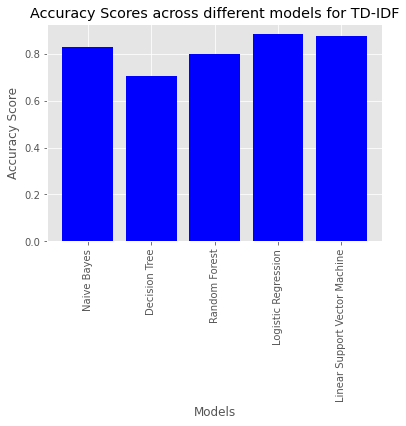

In [32]:
import matplotlib.pyplot as plt

t1 = accuracy_score(target, naive_bayes.predict(y_test_bwm))
t2 = accuracy_score(target, decision_tree.predict(y_test_bwm))
t3 = accuracy_score(target, random_forest.predict(y_test_bwm))
t4 = accuracy_score(target, logistic_reg.predict(y_test_bwm))
t5 = accuracy_score(target, support.predict(y_test_bwm))
plt.style.use('ggplot')

classifiers_name =  ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression', 'Linear Support Vector Machine']
model = [t1,t2,t3,t4,t5]
x_position = [i for i, _ in enumerate(classifiers_name)]
plt.bar(classifiers_name, model, color='blue')
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores across different models for TD-IDF")
plt.xticks(x_position, classifiers_name, rotation = 90)

plt.show()

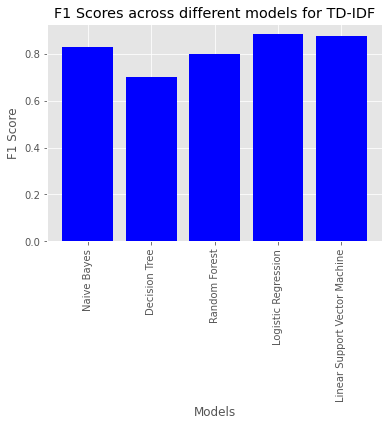

In [33]:
import matplotlib.pyplot as plt

t1 = f1_score(target, naive_bayes.predict(y_test_bwm), average='weighted')
t2 = f1_score(target, decision_tree.predict(y_test_bwm), average='weighted')
t3 = f1_score(target, random_forest.predict(y_test_bwm), average='weighted')
t4 = f1_score(target, logistic_reg.predict(y_test_bwm), average='weighted')
t5 = f1_score(target, support.predict(y_test_bwm), average='weighted')

plt.style.use('ggplot')

classifiers_name =  ['Naive Bayes','Decision Tree','Random Forest','Logistic Regression', 'Linear Support Vector Machine']
model = [t1,t2,t3,t4,t5]
x_position = [i for i, _ in enumerate(classifiers_name)]
plt.bar(classifiers_name, model, color='blue')
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Scores across different models for TD-IDF")
plt.xticks(x_position, classifiers_name, rotation = 90)

plt.show()

# Toxic Comment Detection

In [34]:
replace_without_space = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_with_space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

In [35]:
# Extracting Data from text files and storing into lists
def load_data():
    reviews_train = []
    reviews_test = []
    
    for line in open('training_data.txt', 'r', encoding = "utf8"):
        reviews_train.append(line.strip())

    for line in open('test_data.txt', 'r', encoding = "utf8"):
        reviews_test.append(line.strip())

    return(reviews_train,reviews_test)

In [36]:
# Preprocessing the data
def preprocess_data(reviews):
    reviews = [replace_without_space.sub("", line.lower()) for line in reviews]
    reviews = [replace_with_space.sub(" ", line) for line in reviews]
    return reviews

In [48]:
# Getting the tokens from the data
def token_example(feature_to_coef):
    print("Some positive words and their weightage:")
    for best_positive in sorted(
        feature_to_coef.items(), 
        key=lambda x: x[1], 
        reverse=True)[:10]:
        print (best_positive)
    
    print("Some negative words and their weightage")
    for best_negative in sorted(
        feature_to_coef.items(), 
        key=lambda x: x[1])[:10]:
        print (best_negative)

# Controlling the fitting parameters        
def Regularization_parameter(X_train, y_train, y_val, X_val):
    k = 0
    for c in [0.01, 0.05, 0.25, 0.5, 1]:
        lr = LogisticRegression(C=c)
        lr.fit(X_train, y_train)
        print ("Accuracy for C=%s: %s"% (c, accuracy_score(y_val, lr.predict(X_val))))
        if(k < accuracy_score(y_val, lr.predict(X_val))):
            k = accuracy_score(y_val, lr.predict(X_val))

    return k


In [38]:
# Testing a user defined review
def test_new_review(final_model,ngram_vec):
    prediction = final_model.predict(ngram_vec.transform([input("Analyze Your Own Review:")]))[0]
    if(prediction == 0):
        print("That's a Negative Review!")
    else:
        print("That's a Positive Review!")
    while True:
        a = input("Enter yes/no to continue :")
        if a.lower() == "yes":
                test_new_review(final_model,ngram_vec)
                continue
        elif a.lower() == "no":
            
            sys.exit()

In [49]:
def main():
    
#   Loading the data from text files
    reviews_train,reviews_test = load_data()

#   preprocessing the obtained data
    reviews_train_clean = preprocess_data(reviews_train)
    reviews_test_clean = preprocess_data(reviews_test)
    
#   Initializing the N-gram model
    ngram_vec = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words = {'english'})
    ngram_vec.fit(reviews_train_clean) 
    X = ngram_vec.transform(reviews_train_clean) 
    X_test = ngram_vec.transform(reviews_test_clean)
    target = [1 if i < 12500 else 0 for i in range(25000)]

#   Training and splitting the data
    X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.75)

#   find the best c value using the regularization parameter
    prime_c_value = Regularization_parameter(X_train, y_train, y_val, X_val)

#   build the model using Logistic Regression
    final_model = LogisticRegression(C=prime_c_value)
    final_model.fit(X, target)
    print ("Final Accuracy from Logistic Regression: %s"% accuracy_score(target, final_model.predict(X_test)))
 
    feature_to_coef = {
    word: coef for word, coef in zip(
        ngram_vec.get_feature_names(), final_model.coef_[0]
    )
    }
    
    token_example(feature_to_coef) 

    while(True):
        test_new_review(final_model,ngram_vec)

if __name__ == '__main__':
    try:
        main()
    except:
        print("Task Done!")

Accuracy for C=0.01: 0.88768
Accuracy for C=0.05: 0.89328


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.25: 0.89648


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.89648


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=1: 0.89488


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final Accuracy from Logistic Regression: 0.89752
Some positive words and their weightage:
('excellent', 1.3918170453357557)
('perfect', 1.1830617928326848)
('great', 0.9993796930207764)
('enjoyable', 0.9518569886185224)
('wonderful', 0.9477835745570555)
('superb', 0.9190540368359003)
('amazing', 0.9065676472216541)
('incredible', 0.7607866547673976)
('today', 0.7580733864020609)
('better than', 0.7488260610618654)
Some negative words and their weightage
('worst', -1.6220593093281834)
('awful', -1.547692622219319)
('boring', -1.4243187437967069)
('waste', -1.2891411960414354)
('terrible', -1.2130818194169832)
('disappointment', -1.1880826226085492)
('poor', -1.1797558782140456)
('bad', -1.1547811967619852)
('poorly', -1.148395030662506)
('dull', -1.1309863204618695)
Analyze Your Own Review:loved it
That's a Positive Review!
Enter yes/no to continue :no
Task Done!
